In [ ]:
!unzip /content/drive/MyDrive/BrainDetection.zip

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import shutil

# Step 1: Read and preprocess the images
image_dir = "/content/Brain_Tumor_Detection/yes"
image_files = os.listdir(image_dir)

images = []
for file in image_files:
    image_path = os.path.join(image_dir, file)
    image = cv2.imread(image_path)  # Read the image using OpenCV
    resized_image = cv2.resize(image, (256, 256))  # Resize the image to a common size
    normalized_image = resized_image / 255.0  # Normalize pixel values between 0 and 1
    images.append(normalized_image)

# Step 2: Flatten the images
flattened_images = np.array(images).reshape(len(images), -1)

# Step 3: Perform K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(flattened_images)

# Step 4: Get cluster labels and assign stages
cluster_labels = kmeans.labels_

stage_mapping = {
    0: "Mild",
    1: "Moderate",
    2: "Severe"
}

# Create separate folders for each cluster
output_dir = "/content/"
os.makedirs(output_dir, exist_ok=True)

for i in range(k):
    cluster_dir = os.path.join(output_dir, stage_mapping[i])
    os.makedirs(cluster_dir, exist_ok=True)

# Step 5: Copy images to respective cluster folders
for i, file in enumerate(image_files):
    image_path = os.path.join(image_dir, file)
    cluster_label = cluster_labels[i]
    cluster_dir = os.path.join(output_dir, stage_mapping[cluster_label])
    shutil.copy(image_path, cluster_dir)

print("Images copied into respective clusters.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Images copied into respective clusters.


In [ ]:
import os
import random
import shutil

# Step 1: Define the paths to the severity class folders
mild_dir = "/content/Mild"
moderate_dir = "/content/Moderate"
severe_dir = "/content/Severe"

# Step 2: Define the paths for the training, validation, and test sets
output_dir = "/content/"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "validation")
test_dir = os.path.join(output_dir, "test")

# Step 3: Define the train-test-validation split ratio
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Step 3: Create the train, validation, and test directories
os.makedirs(os.path.join(train_dir, "Mild"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "Moderate"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "Severe"), exist_ok=True)

os.makedirs(os.path.join(val_dir, "Mild"), exist_ok=True)
os.makedirs(os.path.join(val_dir, "Moderate"), exist_ok=True)
os.makedirs(os.path.join(val_dir, "Severe"), exist_ok=True)

os.makedirs(os.path.join(test_dir, "Mild"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Moderate"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Severe"), exist_ok=True)

# Step 4: Define a helper function to copy files to the respective class directories
def copy_files(files, source_dir, destination_dir):
    for file in files:
        src_path = os.path.join(source_dir, file)
        dest_dir = os.path.join(destination_dir, os.path.splitext(file)[0])
        os.makedirs(dest_dir, exist_ok=True)
        dest_path = os.path.join(dest_dir, file)
        shutil.copy(src_path, dest_path)

# Step 5: Get the list of files in each severity class folder
mild_files = os.listdir(mild_dir)
moderate_files = os.listdir(moderate_dir)
severe_files = os.listdir(severe_dir)

# Step 6: Shuffle the files
random.shuffle(mild_files)
random.shuffle(moderate_files)
random.shuffle(severe_files)

# Step 7: Split the files into train, validation, and test sets
num_train_mild = int(train_ratio * len(mild_files))
num_val_mild = int(val_ratio * len(mild_files))
train_mild_files = mild_files[:num_train_mild]
val_mild_files = mild_files[num_train_mild:num_train_mild + num_val_mild]
test_mild_files = mild_files[num_train_mild + num_val_mild:]

num_train_moderate = int(train_ratio * len(moderate_files))
num_val_moderate = int(val_ratio * len(moderate_files))
train_moderate_files = moderate_files[:num_train_moderate]
val_moderate_files = moderate_files[num_train_moderate:num_train_moderate + num_val_moderate]
test_moderate_files = moderate_files[num_train_moderate + num_val_moderate:]

num_train_severe = int(train_ratio * len(severe_files))
num_val_severe = int(val_ratio * len(severe_files))
train_severe_files = severe_files[:num_train_severe]
val_severe_files = severe_files[num_train_severe:num_train_severe + num_val_severe]
test_severe_files = severe_files[num_train_severe + num_val_severe:]

# Step 8: Copy files to the respective directories
copy_files(train_mild_files, mild_dir, os.path.join(train_dir, "Mild"))
copy_files(val_mild_files, mild_dir, os.path.join(val_dir, "Mild"))
copy_files(test_mild_files, mild_dir, os.path.join(test_dir, "Mild"))

copy_files(train_moderate_files, moderate_dir, os.path.join(train_dir, "Moderate"))
copy_files(val_moderate_files, moderate_dir, os.path.join(val_dir, "Moderate"))
copy_files(test_moderate_files, moderate_dir, os.path.join(test_dir, "Moderate"))

copy_files(train_severe_files, severe_dir, os.path.join(train_dir, "Severe"))
copy_files(val_severe_files, severe_dir, os.path.join(val_dir, "Severe"))
copy_files(test_severe_files, severe_dir, os.path.join(test_dir, "Severe"))

print("Data split into train, validation, and test sets.")


Data split into train, validation, and test sets.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Define the input shape of the images
input_shape = (256, 256, 3)  # Assuming images are RGB color images of size 256x256

# Step 2: Define the number of classes
num_classes = 3

# Step 3: Define the paths to the train, validation, and test directories
train_dir = "/content/train"
val_dir = "/content/validation"
test_dir = "/content/test"

# Step 4: Define the data generators to load and preprocess the images
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=10,  # Randomly rotate images
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    shear_range=0.1,  # Randomly apply shearing transformations
    zoom_range=0.1,  # Randomly zoom-in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode="nearest"  # Fill any missing pixels after augmentation
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

# Step 5: Define the data generators to load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Retrieve the class labels for reference
class_labels = list(train_generator.class_indices.keys())

# Create a test dataset
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, *input_shape), dtype=tf.float32),
        tf.TensorSpec(shape=(None, num_classes), dtype=tf.float32)
    )
)

# Print the class labels
print("Class Labels:", class_labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

img_width = 255
img_height = 255
img_channels = 3

# Define the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor
model.add(Flatten())

# Add fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add the output layer with 3 neurons for the 3 classes
model.add(Dense(3, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
# Early Stopping and Model Checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

metric = "accuracy"
#Early Stopping

es = EarlyStopping(monitor = metric, min_delta = 0.01, patience = 5, verbose = 1, mode = "auto")

#Model Checkpoint

mc = ModelCheckpoint(monitor = metric, filepath = "./BrainCancerTreatment.h5", verbose = 1, save_best_only = True, mode = "auto")

cd = [es, mc]

In [ ]:
# Step 7: Compile the model
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Step 8: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks = cd
)

Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.8684
Epoch 1: accuracy improved from -inf to 0.86845, saving model to ./BrainCancerTreatment.h5
33/33 [==============================] - 29s 810ms/step - loss: 0.3557 - accuracy: 0.8684 - val_loss: 0.1588 - val_accuracy: 0.9420
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 0.3033 - accuracy: 0.8751
Epoch 2: accuracy improved from 0.86845 to 0.87512, saving model to ./BrainCancerTreatment.h5
33/33 [==============================] - 23s 689ms/step - loss: 0.3033 - accuracy: 0.8751 - val_loss: 0.2989 - val_accuracy: 0.8705
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 0.2757 - accuracy: 0.8856
Epoch 3: accuracy improved from 0.87512 to 0.88561, saving model to ./BrainCancerTreatment.h5
33/33 [==============================] - 28s 871ms/step - loss: 0.2757 - accuracy: 0.8856 - val_loss: 0.1161 - val_accuracy: 0.9821
Epoch 4/10
33/33 [=========================

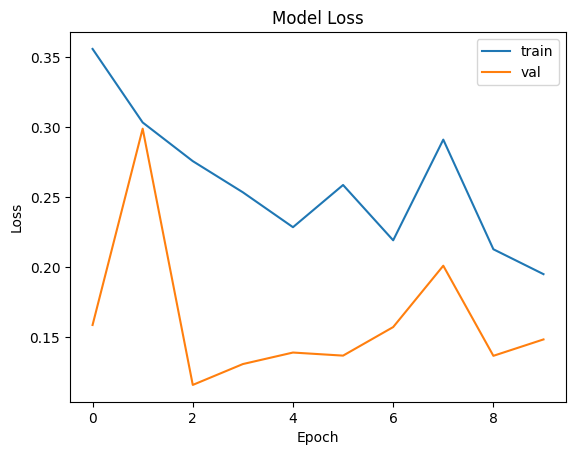

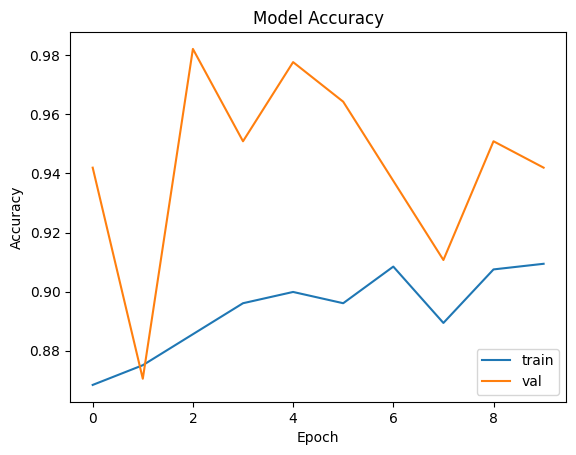

In [ ]:
import matplotlib.pyplot as plt

# plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Predict the classes for the test dataset
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

# Retrieve the true labels from the test generator
y_true = test_generator.classes

# Compute precision, recall, and F1-score
precision = keras.metrics.Precision()(y_true, y_pred)
recall = keras.metrics.Recall()(y_true, y_pred)
f1_score = 2 * ((precision * recall) / (precision + recall))

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

# Print the evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", precision.numpy())
print("Test Recall:", recall.numpy())
print("Test F1-Score:", f1_score.numpy())
print("Confusion Matrix:")
print(confusion_matrix.numpy())


    295/Unknown - 35s 117ms/step - loss: 0.1485 - accuracy: 0.9471

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('/content/BrainCancerTreatment.h5')

# Define the class labels
class_labels = ['Mild', 'Moderate', 'Severe']

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = img_array / 255.0  # Normalize pixel values
    return preprocessed_img

# Function to predict the severity class
def predict_severity(image_path):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    severity_class = class_labels[predicted_class]
    return severity_class

# Example usage
image_path = '/content/test/Mild/y1374/y1374.jpg'  # Path to the new MRI image
predicted_severity = predict_severity(image_path)
print("Predicted Severity:", predicted_severity)


1/1 [==============================] - 0s 128ms/step
Predicted Severity: Mild
